In [1]:
import my_homography as pano
from matplotlib import pyplot as plt
import cv2
import scipy
import pixiedust

Pixiedust database opened successfully


In [7]:
def createMask_fromAny(im):
    '''
    returns a mask same size of im such that any pixel that has some color (not completely black) will accept 255
    holes are filled incase there are completely black pixels in middle of shape
    '''
    mask=np.zeros((im.shape[0],im.shape[1]),dtype=np.bool)
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            if any(im[i,j]):
                mask[i,j]=1
    mask = scipy.ndimage.binary_fill_holes(mask).astype(np.uint8)*255
                  
    return mask
def cropPano(im):
    im_m=createMask_fromAny(im)
    flag=True
    delta=0
    h,w = im_m.shape
    while flag:
#         plt.imshow(im[delta:h-delta,delta:w-delta])
#         plt.show()
        if any(im_m[delta:(h-delta),delta:(w-delta)].ravel()==0):
            delta+=1
        else:
            flag=False
    
    
    return im[delta:(h-delta),delta:(w-delta)]

['./my_data/AmirMom/AmirMom1.jpg', './my_data/AmirMom/AmirMom2.jpg', './my_data/AmirMom/AmirMom3.jpg', './my_data/AmirMom/AmirMom4.jpg', './my_data/AmirMom/AmirMom5.jpg']


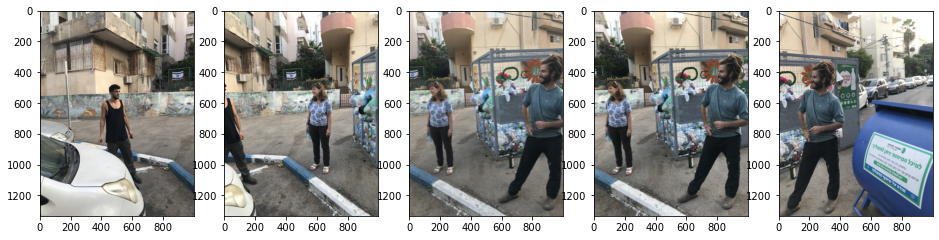

In [2]:
NumSTR =  ['1','2','3','4','5']
ImagesFileNames =['./my_data/AmirMom/AmirMom' + s + '.jpg' for s in NumSTR]
print(ImagesFileNames)
Images=pano.Load_Images(ImagesFileNames,1000)
fig,axes=plt.subplots(1,len(Images),figsize=(16,10))
for i,img in enumerate(Images):
    axes[i].imshow(img)

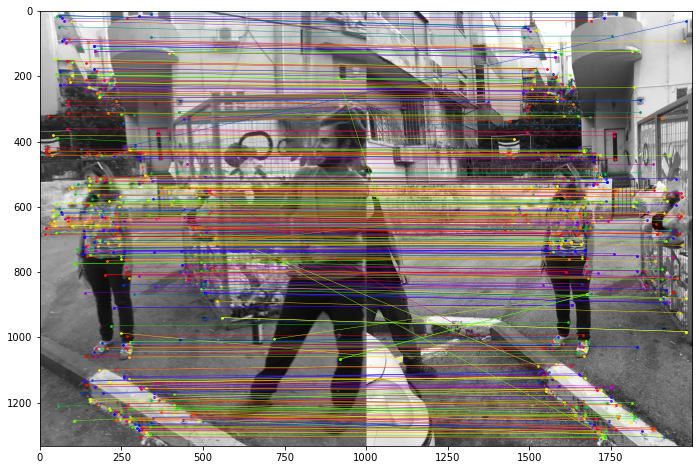

h_warped_left,w_warped_left:
1698 1134


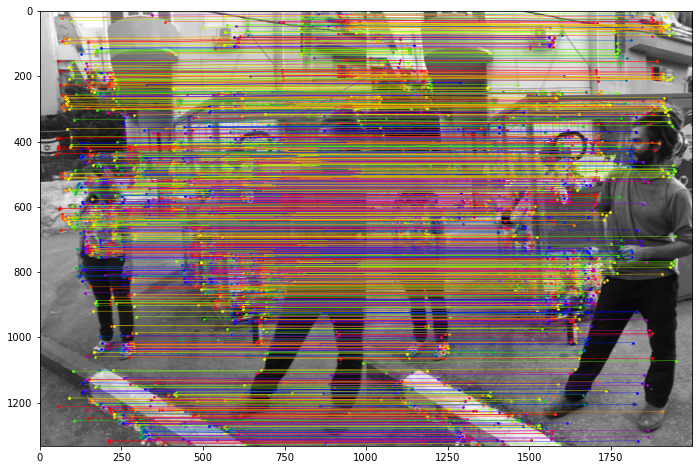

h_warped_right,w_warped_right:
1353 1002


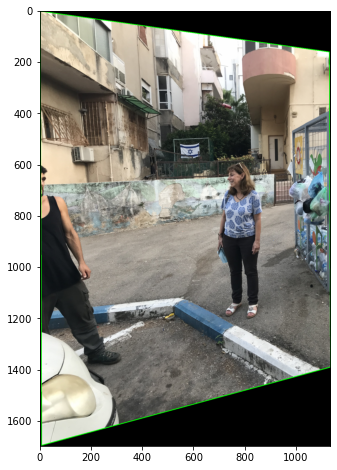

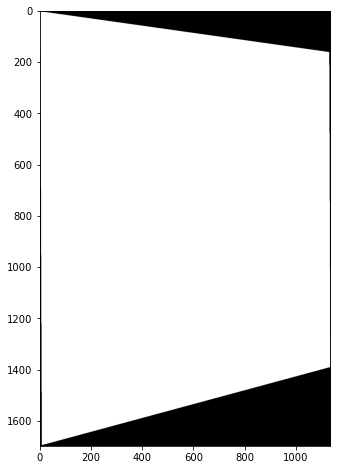

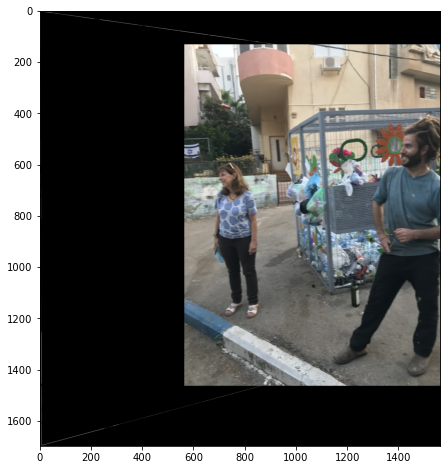

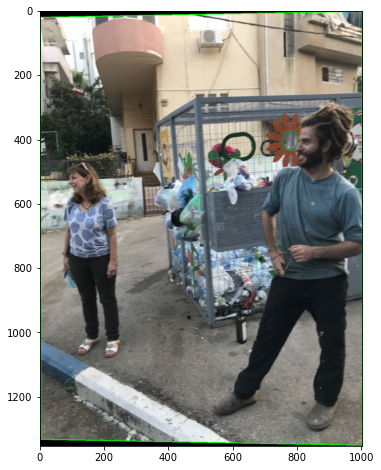

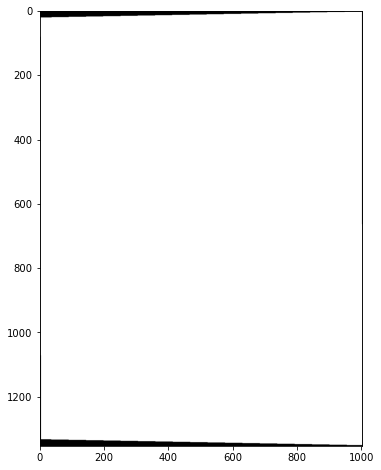

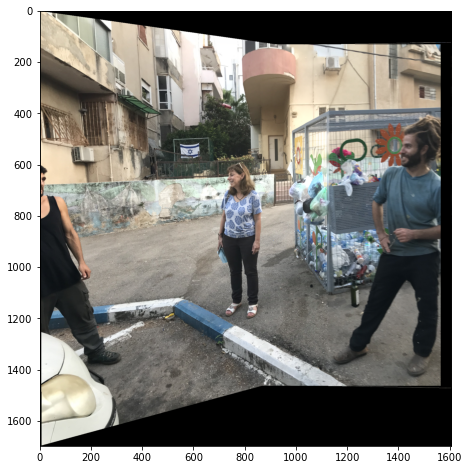

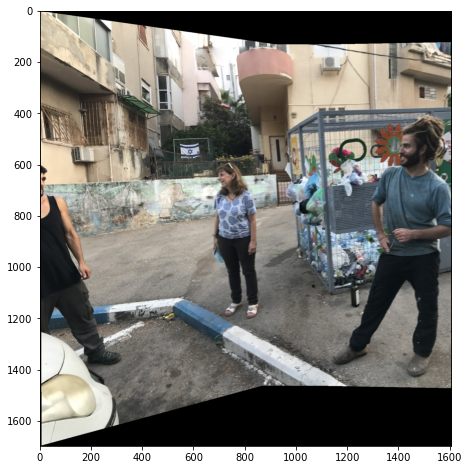

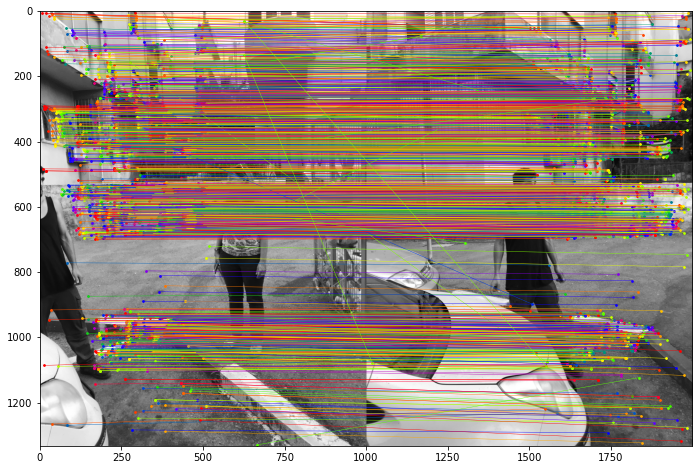

h_warped_left,w_warped_left:
3253 2516


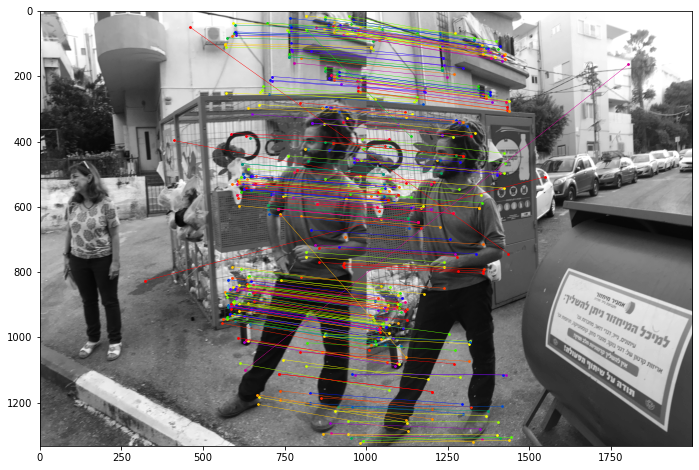

h_warped_right,w_warped_right:
1970 1392


True

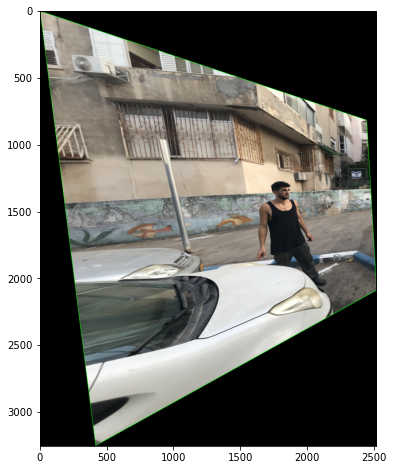

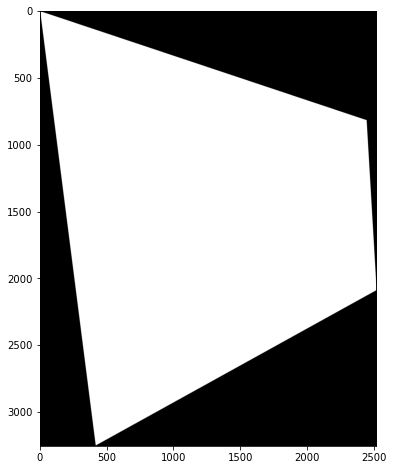

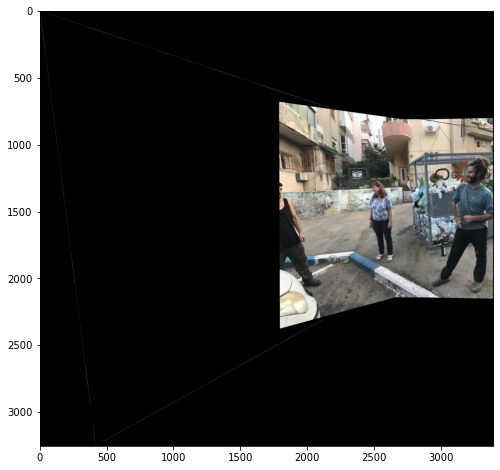

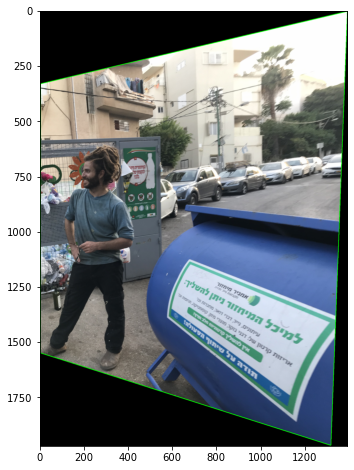

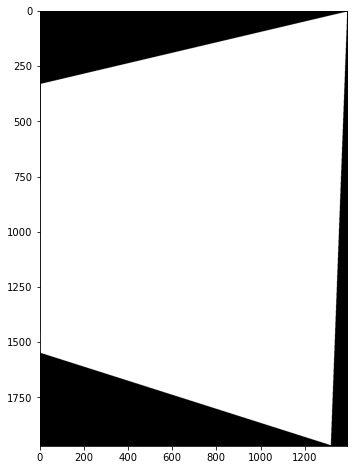

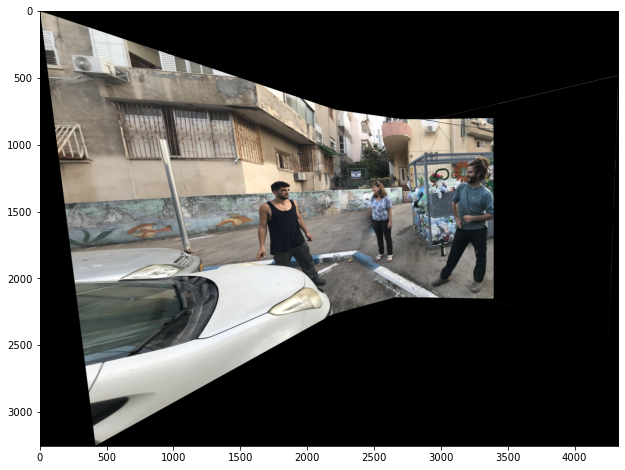

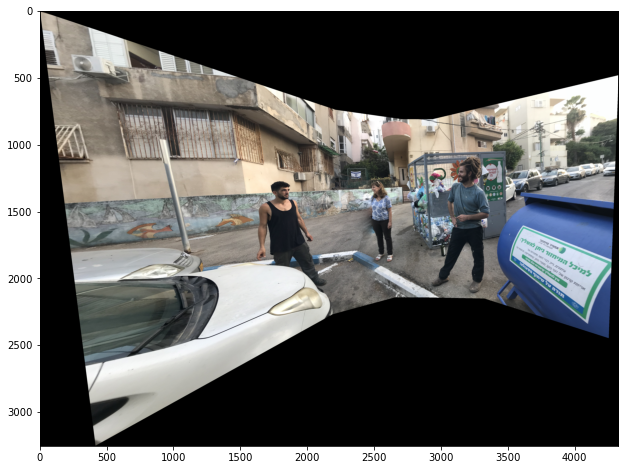

In [5]:
#Homography based pano
Pano=pano.Panorama_Nodd(Images, nIter = 1000, tol = 1, siftmethod = 'flann', plot = 1,  Addinfront=1)
plt.imshow(Pano)
cv2.imwrite('../output/PanoMomAmir.jpg',cv2.cvtColor(Pano,cv2.COLOR_RGB2BGR))

True

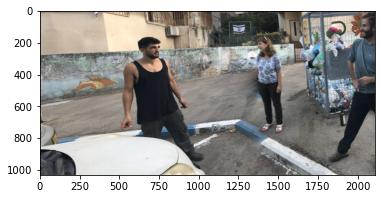

In [8]:
Pano_c=cropPano(Pano)
plt.imshow(Pano_c)
cv2.imwrite('../output/PanoMomAmir_Crop.jpg',cv2.cvtColor(Pano,cv2.COLOR_RGB2BGR))

True

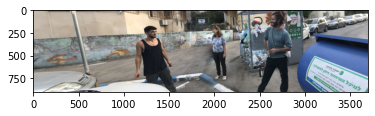

In [11]:
Pano_manualc=Pano[1100:2000,500:4200]
plt.imshow(Pano_manualc)
cv2.imwrite('../output/PanoMomAmir_CropManual.jpg',cv2.cvtColor(Pano_manualc,cv2.COLOR_RGB2BGR))